<a href="https://colab.research.google.com/github/luongnhuy96/Phuong-phap-nghien-cuu-KH/blob/main/VCB_LSTM_predict_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error,mean_absolute_percentage_error

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

! pip install vnstock

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from vnstock import *
df =  stock_historical_data(symbol='VCB', 
                            start_date="2000-01-01", 
                            end_date='2023-03-19')

In [ ]:
df

,Open,High,Low,Close,Volume,TradingDate
0,16245.0,16245.0,16245.0,16245.0,294070,2009-06-30
1,17057.0,17058.0,16110.0,16381.0,6248390,2009-07-01
2,16110.0,16245.0,15568.0,15704.0,1515670,2009-07-02
3,15298.0,15433.0,15162.0,15162.0,899720,2009-07-03
4,15839.0,15839.0,15162.0,15839.0,1571740,2009-07-06
...,...,...,...,...,...,...
3421,92000.0,92000.0,90800.0,91500.0,759814,2023-03-13
3422,91000.0,91200.0,90500.0,91000.0,864241,2023-03-14
3423,91600.0,92000.0,91100.0,91400.0,808217,2023-03-15
3424,91000.0,92000.0,89500.0,91000.0,806313,2023-03-16


In [ ]:
data=df.copy().rename(columns={"Open":"open","High":"high","Low":"low","Close":"close","Volume":"volume","TradingDate":"date"})
data

,open,high,low,close,volume,date
0,16245.0,16245.0,16245.0,16245.0,294070,2009-06-30
1,17057.0,17058.0,16110.0,16381.0,6248390,2009-07-01
2,16110.0,16245.0,15568.0,15704.0,1515670,2009-07-02
3,15298.0,15433.0,15162.0,15162.0,899720,2009-07-03
4,15839.0,15839.0,15162.0,15839.0,1571740,2009-07-06
...,...,...,...,...,...,...
3421,92000.0,92000.0,90800.0,91500.0,759814,2023-03-13
3422,91000.0,91200.0,90500.0,91000.0,864241,2023-03-14
3423,91600.0,92000.0,91100.0,91400.0,808217,2023-03-15
3424,91000.0,92000.0,89500.0,91000.0,806313,2023-03-16


In [ ]:
length_data = len(data)     # rows that data has
split_ratio = 0.7           # %70 train + %30 validation
length_train = round(length_data * split_ratio)  
length_validation = length_data - length_train
print("Data length :", length_data)
print("Train data length :", length_train)
print("Validation data lenth :", length_validation)

Data length : 3426
Train data length : 2398
Validation data lenth : 1028


In [ ]:
train_data = data[:length_train][['close',"date"]] 
train_data

,close,date
0,16245.0,2009-06-30
1,16381.0,2009-07-01
2,15704.0,2009-07-02
3,15162.0,2009-07-03
4,15839.0,2009-07-06
...,...,...
2393,42473.0,2019-01-25
2394,42245.0,2019-01-28
2395,43158.0,2019-01-29
2396,43158.0,2019-01-30


In [ ]:
train_data['date'] = pd.to_datetime(train_data['date'])  # converting to date time object
train_data

,close,date
0,16245.0,2009-06-30
1,16381.0,2009-07-01
2,15704.0,2009-07-02
3,15162.0,2009-07-03
4,15839.0,2009-07-06
...,...,...
2393,42473.0,2019-01-25
2394,42245.0,2019-01-28
2395,43158.0,2019-01-29
2396,43158.0,2019-01-30


In [ ]:
validation_data = data[length_train:][['close',"date"]] 
validation_data['date'] = pd.to_datetime(validation_data['date'])  # converting to date time object
validation_data

,close,date
2398,43006.0,2019-02-01
2399,44224.0,2019-02-11
2400,44605.0,2019-02-12
2401,45518.0,2019-02-13
2402,45823.0,2019-02-14
...,...,...
3421,91500.0,2023-03-13
3422,91000.0,2023-03-14
3423,91400.0,2023-03-15
3424,91000.0,2023-03-16


In [ ]:
train_data


,close,date
0,16245.0,2009-06-30
1,16381.0,2009-07-01
2,15704.0,2009-07-02
3,15162.0,2009-07-03
4,15839.0,2009-07-06
...,...,...
2393,42473.0,2019-01-25
2394,42245.0,2019-01-28
2395,43158.0,2019-01-29
2396,43158.0,2019-01-30


In [ ]:
dataset_train = train_data.close.values
dataset_train.shape

(2398,)

In [ ]:
# Change 1d array to 2d array
# Changing shape from (1692,) to (1692,1)
dataset_train = np.reshape(dataset_train, (-1,1))
dataset_train.shape

(2398, 1)

In [ ]:
dataset_validation = validation_data.close.values  # getting "open" column and converting to array
dataset_validation = np.reshape(dataset_validation, (-1,1))  # converting 1D to 2D array
scaled_dataset_validation =  scaler.fit_transform(dataset_validation)  # scaling open values to between 0 and 1
print("Shape of scaled validation dataset :",scaled_dataset_validation.shape)

Shape of scaled validation dataset : (1028, 1)


In [ ]:
# Creating X_test and y_test
X_test = []
y_test = []

for i in range(time_step, length_validation):
    X_test.append(scaled_dataset_validation[i-time_step:i,0])
    y_test.append(scaled_dataset_validation[i,0])

In [ ]:
# Converting to array
X_test, y_test = np.array(X_test), np.array(y_test)

In [ ]:
print("Shape of X_test before reshape :",X_test.shape)
print("Shape of y_test before reshape :",y_test.shape)

Shape of X_test before reshape : (978, 50)
Shape of y_test before reshape : (978,)


In [ ]:
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))  # reshape to 3D array
y_test = np.reshape(y_test, (-1,1))  # reshape to 2D array

In [ ]:
print("Shape of X_test after reshape :",X_test.shape)
print("Shape of y_test after reshape :",y_test.shape)

Shape of X_test after reshape : (978, 50, 1)
Shape of y_test after reshape : (978, 1)


In [ ]:
scaled_dataset_validation

array([[0.        ],
       [0.02298373],
       [0.03017323],
       ...,
       [0.91319772],
       [0.9056497 ],
       [0.86790957]])

In [ ]:

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0,1))


# scaling dataset
dataset_train_scaled = scaler.fit_transform(dataset_train)

dataset_train_scaled.shape

(2398, 1)

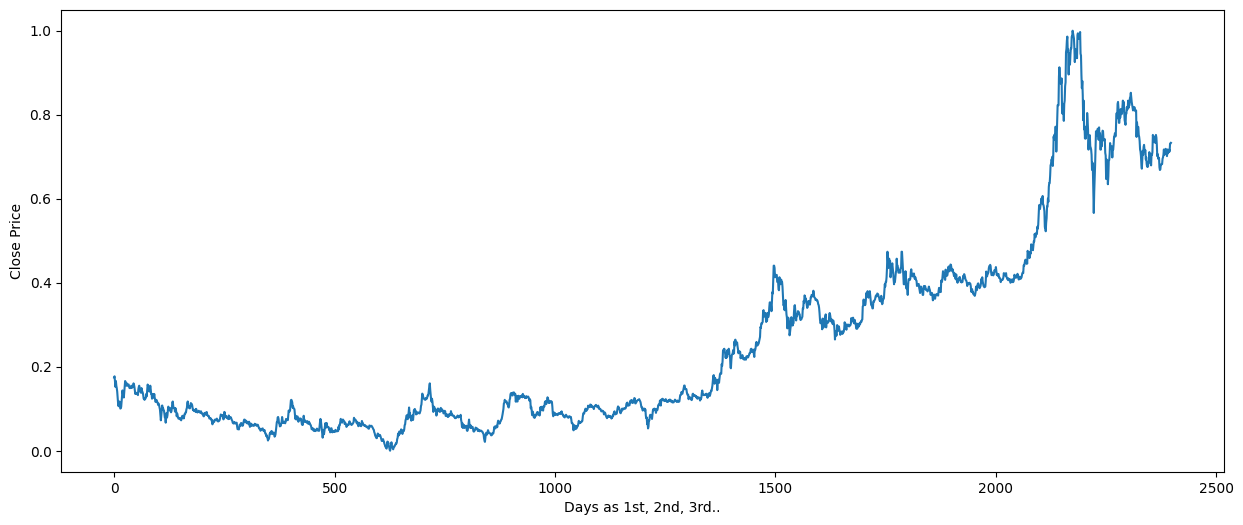

In [ ]:
plt.subplots(figsize = (15,6))
plt.plot(dataset_train_scaled)
plt.xlabel("Days as 1st, 2nd, 3rd..")
plt.ylabel("Close Price")
plt.show()

In [ ]:
X_train = []
y_train = []

time_step = 50

for i in range(time_step, length_train):
    X_train.append(dataset_train_scaled[i-time_step:i,0])
    y_train.append(dataset_train_scaled[i,0])
    
# convert list to array
X_train, y_train = np.array(X_train), np.array(y_train)

In [ ]:
print("Shape of X_train before reshape :",X_train.shape)
print("Shape of y_train before reshape :",y_train.shape)

Shape of X_train before reshape : (2348, 50)
Shape of y_train before reshape : (2348,)


In [ ]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1],1))
y_train = np.reshape(y_train, (y_train.shape[0],1))

print("Shape of X_train after reshape :",X_train.shape)
print("Shape of y_train after reshape :",y_train.shape)

Shape of X_train after reshape : (2348, 50, 1)
Shape of y_train after reshape : (2348, 1)


In [ ]:
X_train[0]

array([[0.17438636],
       [0.17720104],
       [0.1631897 ],
       [0.15197235],
       [0.16598369],
       [0.15478704],
       [0.14917836],
       [0.14077569],
       [0.12676435],
       [0.11275301],
       [0.10602674],
       [0.11275301],
       [0.11724409],
       [0.11331181],
       [0.10041806],
       [0.10097686],
       [0.10435035],
       [0.11724409],
       [0.12955834],
       [0.14356968],
       [0.13516702],
       [0.13237303],
       [0.12676435],
       [0.14077569],
       [0.15478704],
       [0.16598369],
       [0.1631897 ],
       [0.15758103],
       [0.15478704],
       [0.16037502],
       [0.15758103],
       [0.15478704],
       [0.15758103],
       [0.15758103],
       [0.15197235],
       [0.14917836],
       [0.14917836],
       [0.14917836],
       [0.15197235],
       [0.15478704],
       [0.14917836],
       [0.15197235],
       [0.15197235],
       [0.15478704],
       [0.16037502],
       [0.15758103],
       [0.15197235],
       [0.143

In [ ]:
y_train[0]

array([0.13796101])

In [ ]:
#y_train = scaler.fit_transform(y_train)

In [ ]:
from keras.layers import LSTM
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM, GRU
from keras.layers import Dropout
from sklearn.preprocessing import MinMaxScaler
from keras.models import load_model
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
import itertools
import random
import os
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
model_lstm = Sequential()
model_lstm.add(
    LSTM(64,return_sequences=True,input_shape = (X_train.shape[1],1))) #64 lstm neuron block
model_lstm.add(
    LSTM(64, return_sequences= False))
model_lstm.add(Dense(32))
model_lstm.add(Dense(1))
model_lstm.compile(loss = "mean_squared_error", optimizer = "adam", metrics = ["accuracy"])
history2 = model_lstm.fit(X_train, y_train, epochs = 10, batch_size = 10)

Epoch 1/10
235/235 [==============================] - 21s 64ms/step - loss: 0.0025 - accuracy: 8.5179e-04
Epoch 2/10
235/235 [==============================] - 15s 65ms/step - loss: 7.0403e-04 - accuracy: 8.5179e-04
Epoch 3/10
235/235 [==============================] - 14s 61ms/step - loss: 4.5343e-04 - accuracy: 8.5179e-04
Epoch 4/10
235/235 [==============================] - 15s 62ms/step - loss: 5.8974e-04 - accuracy: 8.5179e-04
Epoch 5/10
235/235 [==============================] - 15s 62ms/step - loss: 3.8848e-04 - accuracy: 8.5179e-04
Epoch 6/10
235/235 [==============================] - 15s 65ms/step - loss: 3.5120e-04 - accuracy: 8.5179e-04
Epoch 7/10
235/235 [==============================] - 17s 73ms/step - loss: 2.3965e-04 - accuracy: 8.5179e-04
Epoch 8/10
235/235 [==============================] - 16s 69ms/step - loss: 2.5275e-04 - accuracy: 8.5179e-04
Epoch 9/10
235/235 [==============================] - 15s 63ms/step - loss: 1.9092e-04 - accuracy: 8.5179e-04
Epoch 10/10
23

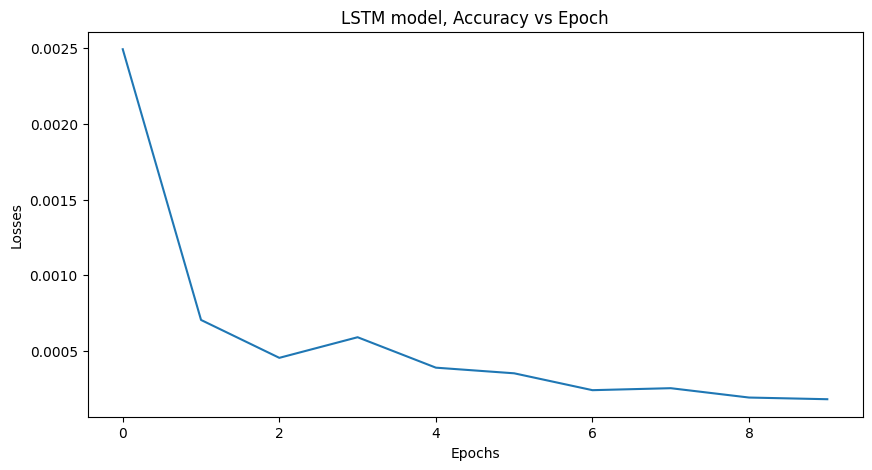

In [ ]:
plt.figure(figsize =(10,5))
plt.plot(history2.history["loss"])
plt.xlabel("Epochs")
plt.ylabel("Losses")
plt.title("LSTM model, Accuracy vs Epoch")
plt.show()

31/31 [==============================] - 2s 21ms/step


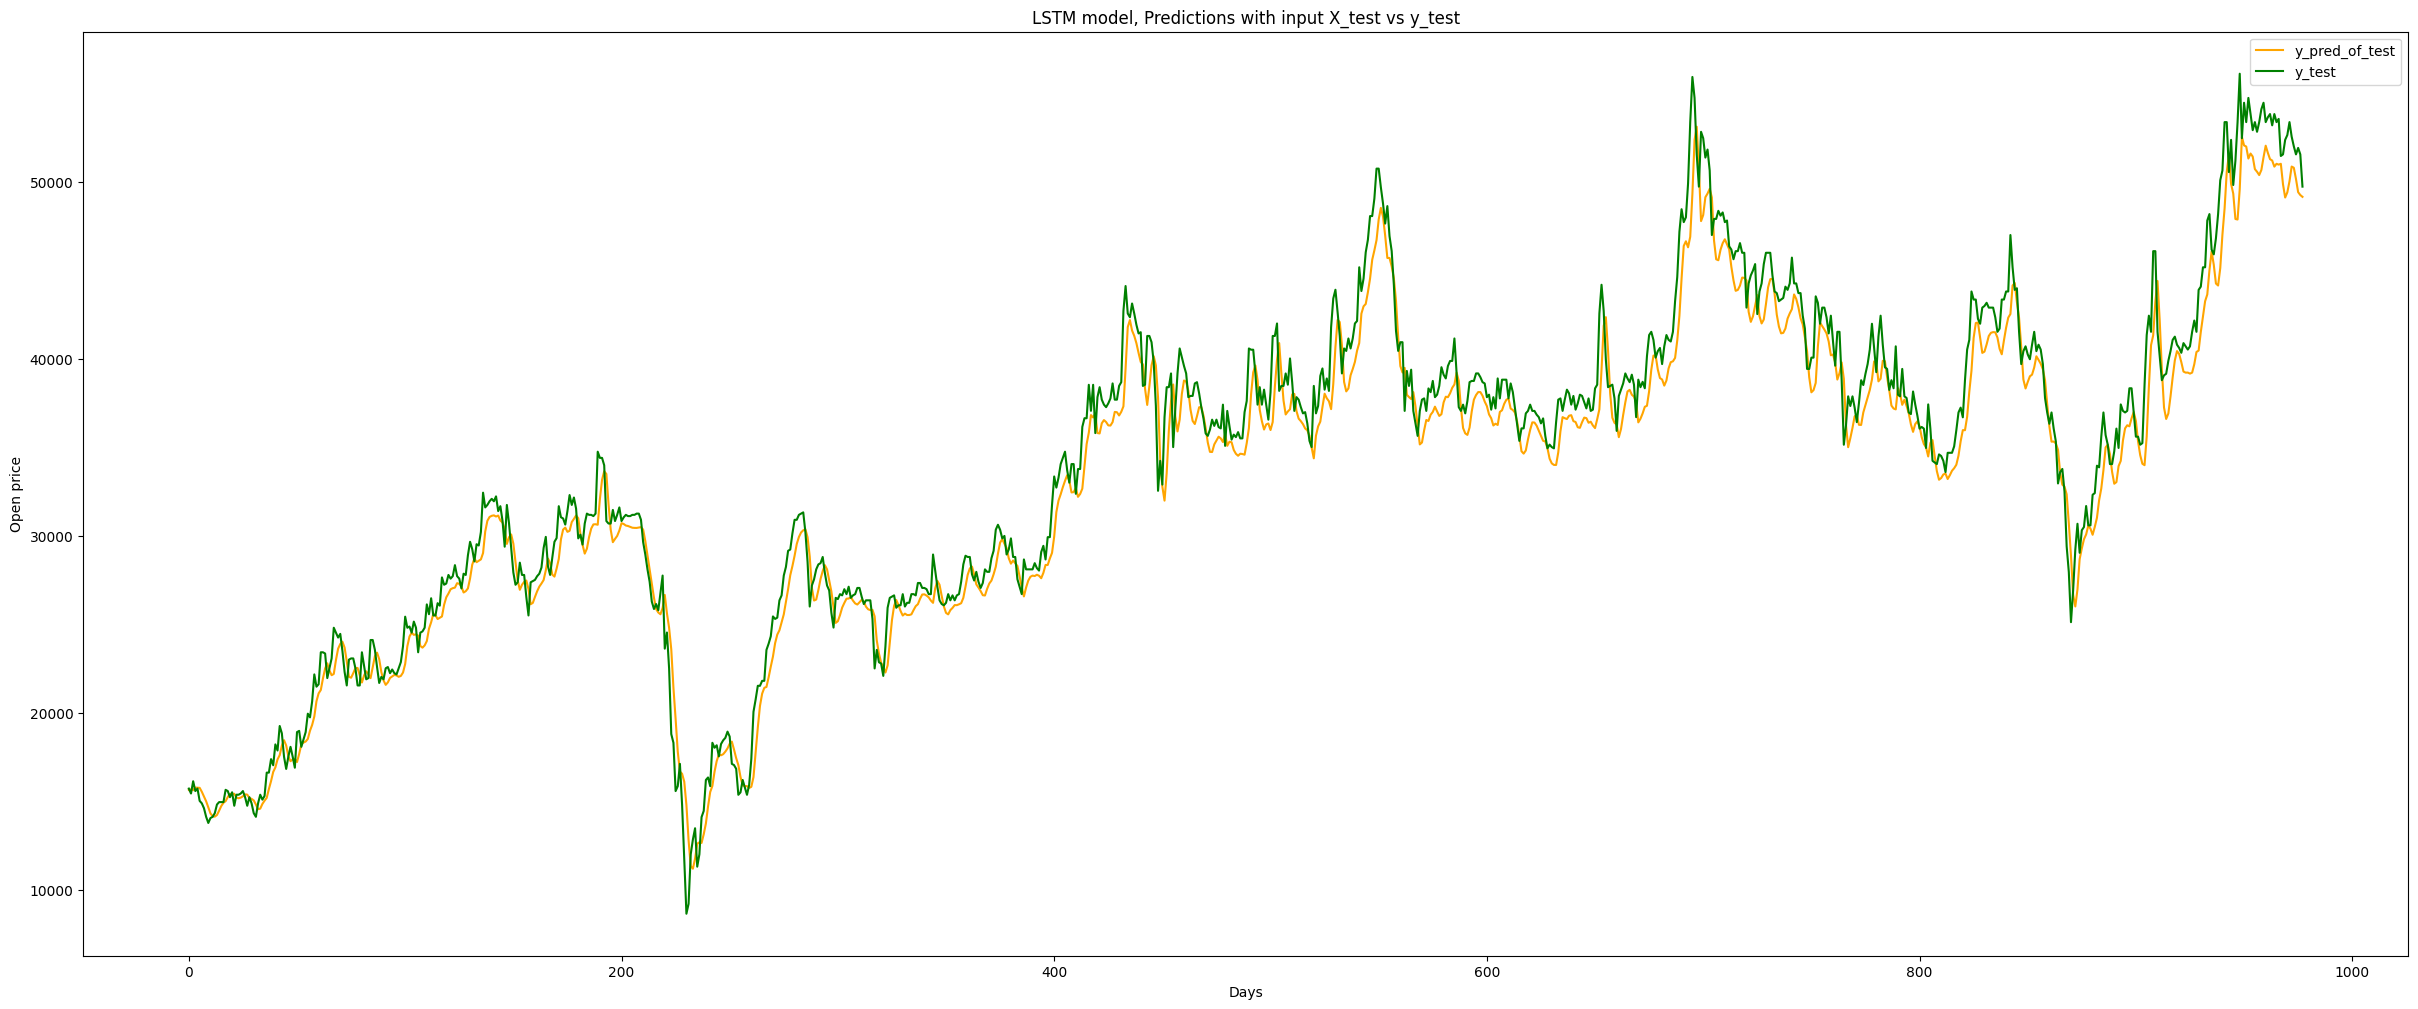

In [ ]:
plt.subplots(figsize =(30,12))
plt.plot(scaler.inverse_transform(model_lstm.predict(X_test)), label = "y_pred_of_test", c = "orange" )
plt.plot(scaler.inverse_transform(y_test), label = "y_test", color = "g")
plt.xlabel("Days")
plt.ylabel("Open price")
plt.title("LSTM model, Predictions with input X_test vs y_test")
plt.legend()
plt.show()

In [ ]:
y_test_new=scaler.inverse_transform(y_test)

In [ ]:
y_test_new

array([[0.16375439],
       [0.15799902],
       [0.17235913],
       [0.16086727],
       [0.16375439],
       [0.1493754 ],
       [0.14650715],
       [0.14077065],
       [0.13071291],
       [0.12352342],
       [0.12927879],
       [0.13071291],
       [0.13501528],
       [0.14507303],
       [0.14794128],
       [0.14794128],
       [0.14794128],
       [0.16230139],
       [0.16086727],
       [0.15369664],
       [0.15943314],
       [0.1436389 ],
       [0.15656489],
       [0.15656489],
       [0.15799902],
       [0.16086727],
       [0.15369664],
       [0.1436389 ],
       [0.15369664],
       [0.14650715],
       [0.13501528],
       [0.13071291],
       [0.14650715],
       [0.15656489],
       [0.15080953],
       [0.15513077],
       [0.18241688],
       [0.18241688],
       [0.19821112],
       [0.1910405 ],
       [0.21545835],
       [0.20826886],
       [0.23698909],
       [0.22838435],
       [0.20109824],
       [0.18671925],
       [0.20109824],
       [0.212

In [ ]:
y_pred_new=scaler.inverse_transform(model_lstm.predict(X_test))


31/31 [==============================] - 1s 21ms/step


In [ ]:
print('Test R2 Score: ', r2_score(y_test_new, y_pred_new))
print('Test MAE: ', mean_absolute_error(y_test_new, y_pred_new))
print('Test mape: ', mean_absolute_percentage_error(y_test_new, y_pred_new))
print('Test rmse: ', mean_squared_error(y_test_new, y_pred_new))

Test R2 Score:  0.9646451489285464
Test MAE:  1403.3402474302673
Test mape:  0.042191022233123904
Test rmse:  3216862.2631396716


In [ ]:
y_pred_new

array([[15653.833 ],
       [15693.052 ],
       [15640.483 ],
       [15787.    ],
       [15782.956 ],
       [15773.238 ],
       [15551.671 ],
       [15288.981 ],
       [15012.32  ],
       [14676.3125],
       [14328.038 ],
       [14168.515 ],
       [14144.191 ],
       [14236.699 ],
       [14483.805 ],
       [14746.539 ],
       [14929.058 ],
       [15020.726 ],
       [15252.717 ],
       [15430.081 ],
       [15423.405 ],
       [15436.998 ],
       [15220.027 ],
       [15184.3125],
       [15220.586 ],
       [15295.008 ],
       [15404.67  ],
       [15389.96  ],
       [15195.518 ],
       [15149.919 ],
       [15064.345 ],
       [14831.039 ],
       [14564.221 ],
       [14595.921 ],
       [14863.144 ],
       [15046.536 ],
       [15207.471 ],
       [15704.555 ],
       [16152.361 ],
       [16671.914 ],
       [16929.146 ],
       [17378.482 ],
       [17621.23  ],
       [18156.586 ],
       [18466.182 ],
       [18167.945 ],
       [17556.936 ],
       [17277